<a href="https://colab.research.google.com/github/jakuberwid/LMAD/blob/main/LMAD_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

### Wczytanie i preprocessing danych

#### Dane trywialne

In [5]:
dane = pd.DataFrame({'x' : [2, 1, 0, -1, -2, -1,  0,  1],
                     'y' : [0, 1, 2,  1,  0, -1, -2, -1],
                     'c' : [0, 1, 2,  3,  4,  5,  6,  7]})

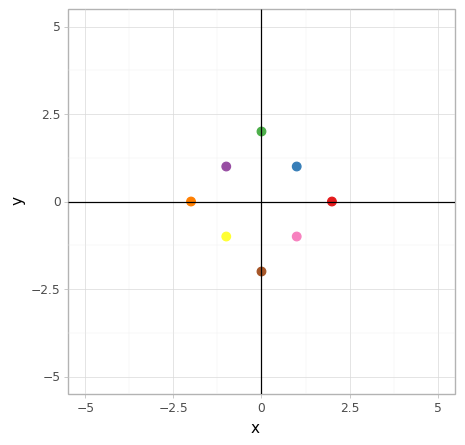

<ggplot: (8783461956597)>

In [6]:
(ggplot(dane, aes('x','y', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() + 
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [7]:
# A = np.array([[2,0],[0,1]])
# A = np.array([[1,0],[0,-0.5]])
# A = np.array([[0,2],[1,0]])
A = np.array([[3,0],[4,5]])
print(A)

[[3 0]
 [4 5]]


In [8]:
dane[['x_A', 'y_A']] = np.matmul(dane.iloc[:,:2], A)

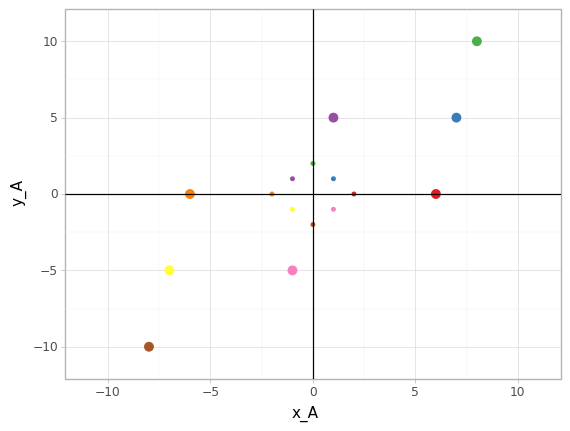

<ggplot: (8783428137801)>

In [9]:
(ggplot(dane, aes('x_A','y_A', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

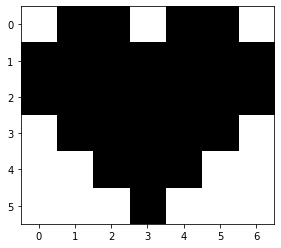

In [10]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

#### Dane rzeczywiste

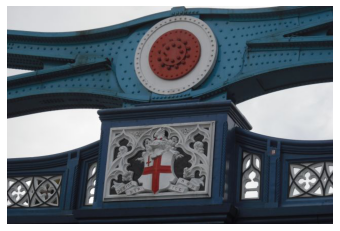

In [14]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.axis('off')
plt.show()

#### Zadanie - Most ...

Przekształć kolorowy obrazek do postaci czarno-białej.

![most_sz.jpg](attachment:most_sz.jpg)

In [15]:
most_flat = most.reshape(-1, 3)
most_sr = most_flat.mean(axis = 1)
most_sr = most_sr.reshape(most.shape[:-1])

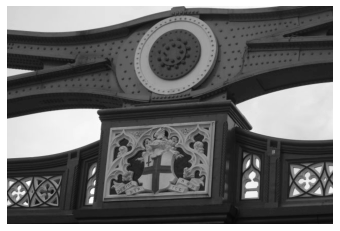

In [16]:
plt.imshow(most_sr, cmap='gray')
plt.axis('off')
plt.show()

In [17]:
rozmiar = np.prod(most_sr.shape)
print(f'Rozmiar danych to {rozmiar}')

Rozmiar danych to 273280


### Rozkład według wartości osobliwych (**SVD** - *Singular Value Decomposition*)

każdą macierz rzeczywistą $A$ można przedstawić w postaci dekompozycji na iloczyn trzech specyficznych macierzy:

$$ A=U\Sigma V^{T},$$


gdzie:

$U$ i $V$ – macierze ortogonalne (czyli $U^{-1}=U^{T}$ $V^{-1}=V^T)$,

$\Sigma$  – macierz diagonalna, taka że $\Sigma={diag}(\sigma _{i})$ gdzie $\sigma_{i}$ – nieujemne wartości szczególne (osobliwe) macierzy $A$, zwyczajowo uporządkowane nierosnąco.

In [18]:
from numpy.linalg import svd

#### Przykład trywialny

In [19]:
U,S,V = svd(A)
sigma = np.diag(S)

In [20]:
sigma

array([[6.70820393, 0.        ],
       [0.        , 2.23606798]])

In [21]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz sigma ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (2, 2)
Macierz sigma ma wymiary (2,)
Macierz V ma wymiary (2, 2)


In [22]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V.T, V).round(2))

[[1. 0.]
 [0. 1.]]
[[ 1. -0.]
 [-0.  1.]]


In [23]:
dane[['x_SVD', 'y_SVD']] = np.matmul(dane.iloc[:,:2],np.matmul(np.matmul(U, sigma), V))

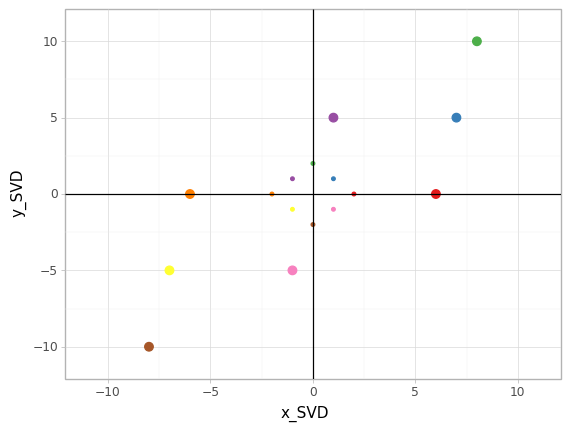

<ggplot: (8783426355937)>

In [24]:
(ggplot(dane, aes('x_SVD','y_SVD', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

#### Obrót zgodnie z macierzą $U$

In [25]:
U

array([[-0.31622777, -0.9486833 ],
       [-0.9486833 ,  0.31622777]])

In [26]:
dane[['x_U', 'y_U']] = np.matmul(dane.iloc[:,:2], U)

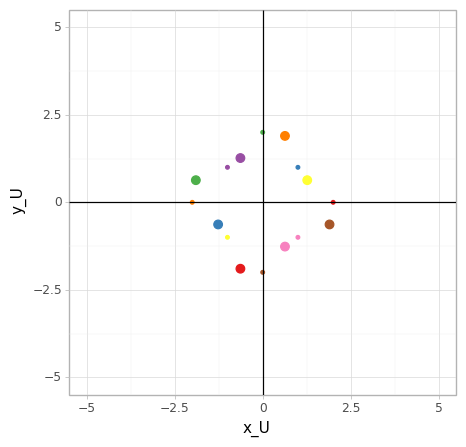

<ggplot: (8783428030533)>

In [27]:
(ggplot(dane, aes('x_U','y_U', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

#### Rozciągnięcie zgodnie z macierzą $\sigma$

In [28]:
S
# sigma

array([6.70820393, 2.23606798])

In [29]:
dane[['x_S', 'y_S']] = np.matmul(dane.iloc[:,:2], sigma)

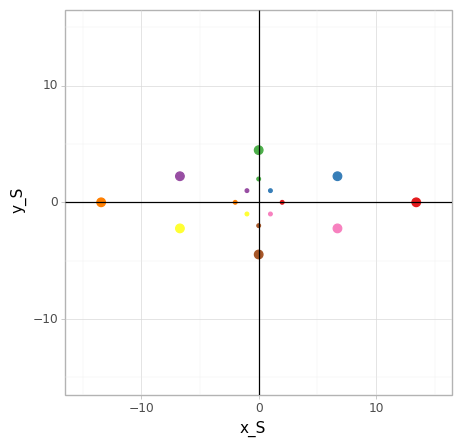

<ggplot: (8783426314677)>

In [30]:
(ggplot(dane, aes('x_S','y_S', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Obrót zgodnie z macierzą $V$

In [31]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [32]:
dane[['x_V', 'y_V']] = np.matmul(dane.iloc[:,:2], V)

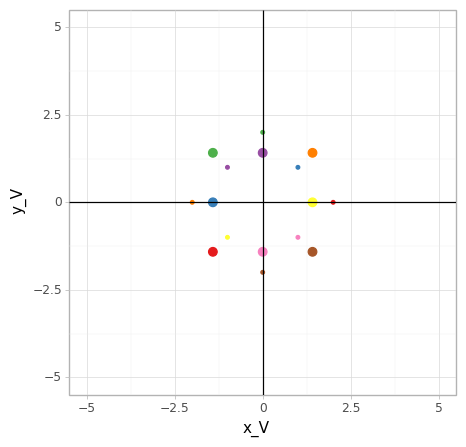

<ggplot: (8783426275313)>

In [33]:
(ggplot(dane, aes('x_V','y_V', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [34]:
proc_waz = S/sum(S)
print(proc_waz)

[0.75 0.25]


#### Odtworzenie przekształcenia $A$ za pomocą jednej wartości osobliwej

In [35]:
k = 1
Uk=U[:,:k]
Vk=V[:k,:]
Sk=S[:k]

In [36]:
print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (2, 1)
Macierz Sk ma wymiary (1,)
Macierz Vk ma wymiary (1, 2)


In [37]:
dane[['x_SVD1', 'y_SVD1']] = np.matmul(dane.iloc[:,:2],np.matmul(np.outer(Uk, Sk), Vk))

In [38]:
dane[['x_SVD1', 'y_SVD1']]

,x_SVD1,y_SVD1
0,3.0,3.0
1,6.0,6.0
2,9.0,9.0
3,3.0,3.0
4,-3.0,-3.0
5,-6.0,-6.0
6,-9.0,-9.0
7,-3.0,-3.0


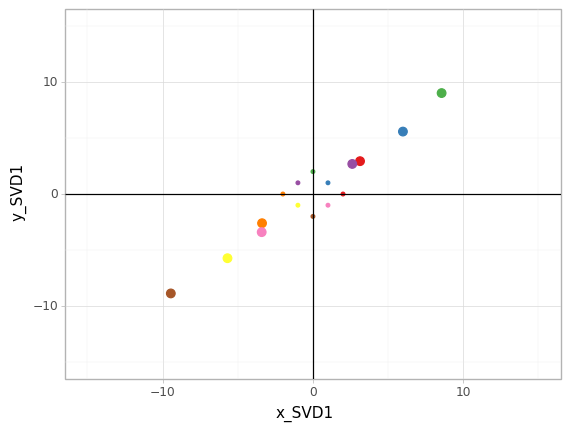

<ggplot: (8783426302637)>

In [39]:
(ggplot(dane, aes('x_SVD1','y_SVD1', color = 'factor(c)')) +
 geom_jitter(size = 3, show_legend = False, width=0.5, height=0.5) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Serce

In [82]:
n = len(serce)
U, S, V = svd(serce)
sigma = np.diag(S)

In [83]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V, V.T).round(2))

[[ 1.  0.  0. -0.  0.  0.]
 [ 0.  1.  0. -0.  0.  0.]
 [ 0.  0.  1.  0. -0. -0.]
 [-0. -0.  0.  1.  0.  0.]
 [ 0.  0. -0.  0.  1. -0.]
 [ 0.  0. -0.  0. -0.  1.]]
[[ 1. -0. -0. -0. -0.  0. -0.]
 [-0.  1.  0. -0. -0.  0.  0.]
 [-0.  0.  1. -0.  0. -0. -0.]
 [-0. -0. -0.  1. -0. -0. -0.]
 [-0. -0.  0. -0.  1. -0.  0.]
 [ 0.  0. -0. -0. -0.  1.  0.]
 [-0.  0. -0. -0.  0.  0.  1.]]


In [84]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz sigma ma wymiary {sigma.shape}')
print(f'Macierz V ma wymiary {V.shape}')

sigma_to_V = np.c_[sigma, np.zeros((n, V.shape[0]-n))]
print(f'Macierz sigma_to_V ma wymiary {sigma_to_V.shape}')

Macierz U ma wymiary (6, 6)
Macierz S ma wymiary (6,)
Macierz sigma ma wymiary (6, 6)
Macierz V ma wymiary (7, 7)
Macierz sigma_to_V ma wymiary (6, 7)


In [85]:
print(np.matmul(U, sigma).shape)
# print(np.matmul(np.matmul(U, sigma), V).shape)

print(np.matmul(np.matmul(U, sigma_to_V), V).shape)

(6, 6)
(6, 7)


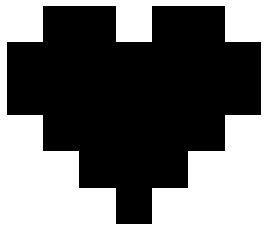

In [86]:
obraz_all = np.matmul(np.matmul(U, sigma_to_V), V)
plt.imshow(1-obraz_all, cmap='gray')
plt.axis('off')
plt.show()

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy każdej wartości osobliwej. 

In [87]:
imgs = []
for i in range(n):
    imgs.append(np.matmul(np.matmul(U[:,i:i+1], np.diag(S[i:i+1])), V[i:i+1,:]))

#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych wartości osobliwych. 

In [88]:
razem_imgs = []
for i in range(1,n+1):
    img = np.matmul(np.matmul(U[:,:i], np.diag(S[:i])), V[:i,:])
    razem_imgs.append(img)

#### Wizualizacja każdej wartości osobliwych


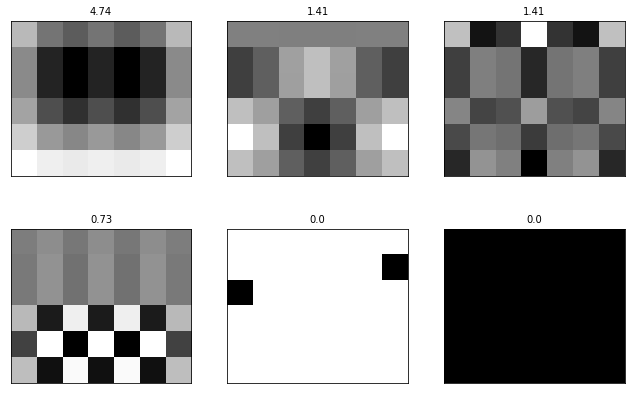

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


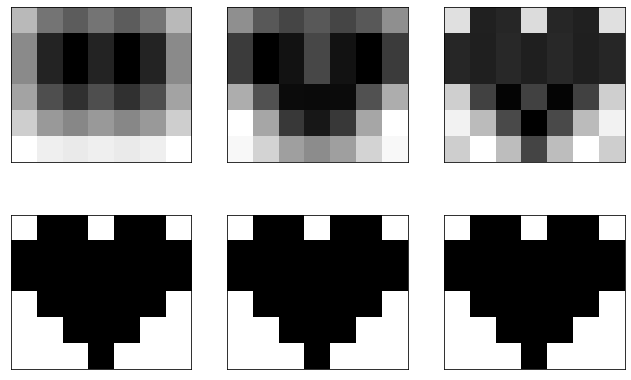

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-razem_imgs[i], cmap='gray')
plt.show()

#### Przykład rzeczywisty

In [91]:
n = len(most_sr)
U, S, V = svd(most_sr)

In [54]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427,)
Macierz V ma wymiary (640, 640)


In [55]:
k = 20
Uk=U[:,:k]
Sk=S[:k]
Vk=V[:k,:]

In [56]:
print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (427, 20)
Macierz Sk ma wymiary (20,)
Macierz Vk ma wymiary (20, 640)


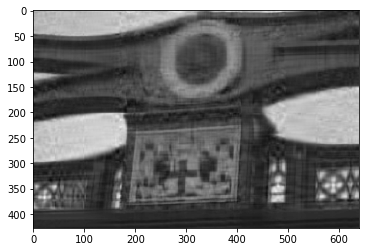

In [57]:
obraz = np.matmul(np.matmul(Uk, np.diag(Sk)), Vk)
plt.imshow(obraz, cmap='gray')
plt.show()

In [92]:
rozmiark = np.prod(Uk.shape)+np.prod(Sk.shape)+np.prod(Vk.shape)
print(f'Rozmiar danych to {rozmiark}, co stanowi {rozmiark/rozmiar:.2%}')

Rozmiar danych to 21360, co stanowi 7.82%


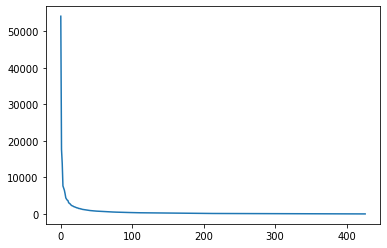

In [59]:
plt.plot(S);

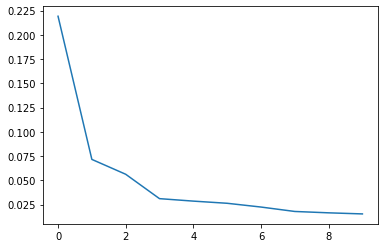

In [60]:
proc_waz = S/sum(S)
plt.plot(proc_waz[:10])

#### Zadanie - obrazy każdej wartości osobliwej

Przygotuj macierze rezprezentujące obrazy 60 pierwszych wartości osobliwych. 

In [93]:
imgs = []
for i in range(n):
    imgs.append(np.matmul(np.matmul(U[:,i:i+1], np.diag(S[i:i+1])), V[i:i+1,:]))

#### Zadanie - skumulowane obrazy kolejnych wartości osobliwych

Przygotuj macierze rezprezentujące obrazy skumulowanych kolejnych 60 pierwszych wartości osobliwych. 

In [94]:
razem_imgs = []
for i in range(1,n+1):
    img = np.matmul(np.matmul(U[:,:i], np.diag(S[:i])), V[:i,:])
    razem_imgs.append(img)

#### Wizualizacja każdej wartości osobliwych


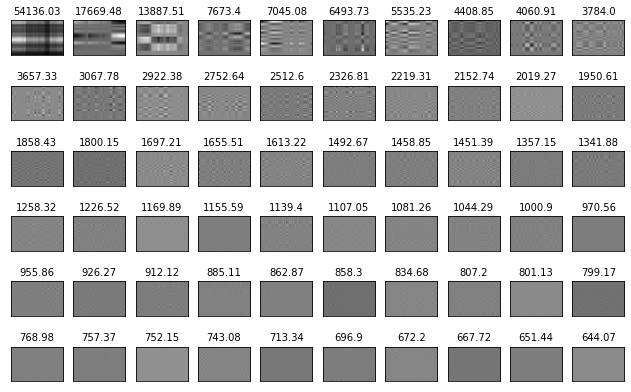

In [95]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Wizualizacja kolejnych skumulowanych wartości osobliwych


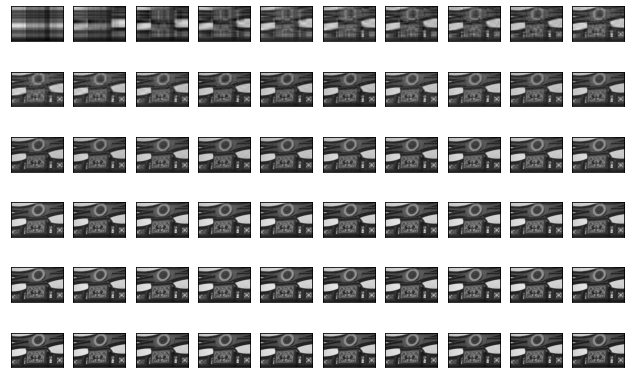

In [96]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(razem_imgs[i], cmap='gray')
plt.show()